In [1]:
from layers import *
from synaptics import *
from visual_env import *
import numpy as np
import matplotlib.pyplot as plt

# PARAMETERS OF NETWORK:
retina_size = (3, 5)
resolution = .1
input_layer_size = retina_size[0] * retina_size[1]
output_layer_size = 1
tau = 30
triplet_tau = 0
preset = 'RS'
g_strength = 200

In [2]:
layer0 = IzhikevichLayer(size=input_layer_size, resolution=resolution, tau=tau, preset=preset)
layer0.transmitter_impact = g_strength
layer1 = IzhikevichLayer(size=output_layer_size, resolution=resolution, tau=tau, preset=preset)
synapse = Synapse(layer0, layer1)
#synapse.load_weights(name='checkpoints\qwe.npy')

In [3]:
layer0 = IzhikevichLayer(size=input_layer_size, resolution=resolution, tau=tau, preset=preset)
layer0.transmitter_impact = g_strength
layer1 = IzhikevichLayer(size=output_layer_size, resolution=resolution, tau=tau, preset=preset)
synapse = Synapse(layer0, layer1)
#synapse.weights_init(mode='all_05')

In [4]:
''' CAREFULLY! '''

' CAREFULLY! '

In [13]:
weights = np.zeros(input_layer_size).reshape(1, input_layer_size, output_layer_size)
pre_v = np.zeros(input_layer_size).reshape(1, input_layer_size)
pre_syn = np.zeros(input_layer_size).reshape(1, input_layer_size)
post_v = np.zeros(output_layer_size).reshape(1, output_layer_size)
post_syn = np.zeros(output_layer_size).reshape(1, output_layer_size)

In [14]:
vis = retina(size=retina_size)
pattern = np.ones(3).reshape(1,3) * 30
vis.add_object(pattern)
vis.set_position_lazy(x='left', y='centered')
state = vis.show_current_state()
print(state)
print(vis.buffer_screen)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [30. 30. 30.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [15]:
g_strength = 130
layer0.transmitter_impact = g_strength

t = 1000
time = int(t / resolution)
lr = .01
alpha = 3
pattern_delay = int(4 / resolution)
direction = 'left'
gather_data = True

for i in range(time):
    synapse.forward()
    picture = vis.tick(delay=pattern_delay, move_direction=direction, noize_density=.1, noize_acceleration=0, rest=int(120/resolution))
    layer0.apply_current(picture.flatten())
    layer1.forward()
    #synapse.STDP(learning_rate=lr, assymetry=alpha)
    if gather_data:
        weights = np.append(weights, np.array([synapse.weights]), axis=0)
        pre_v = np.append(pre_v, np.array([layer0.v]), axis=0)
        pre_syn = np.append(pre_syn, np.array([layer0.impulses]), axis=0)
        post_v = np.append(post_v, np.array([layer1.v]), axis=0)
        post_syn = np.append(post_syn, np.array([layer1.impulses]), axis=0)
    else:
        synapse.STDP(learning_rate=lr, assymetry=alpha)
layer0.instant_rest()
layer1.instant_rest()

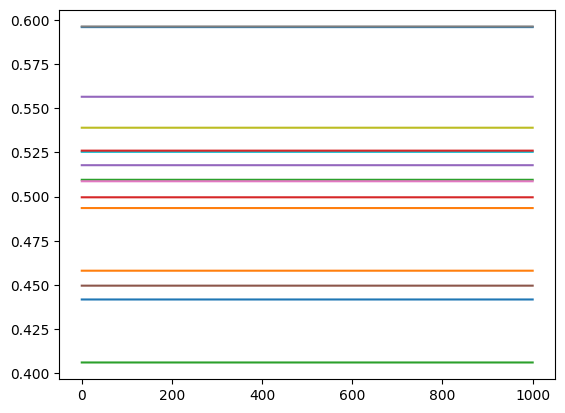

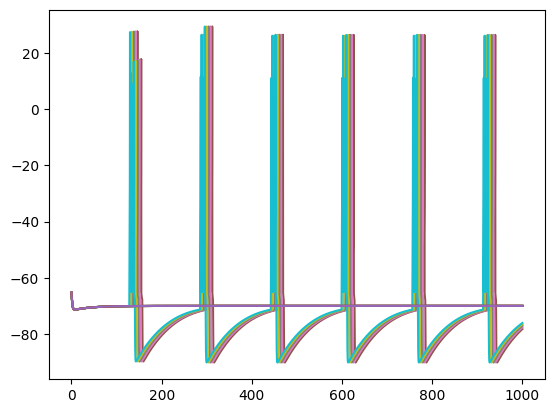

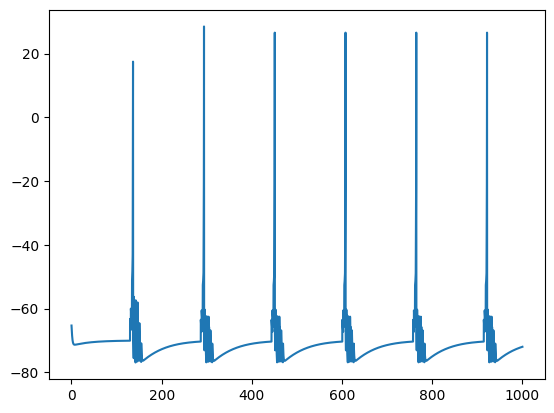

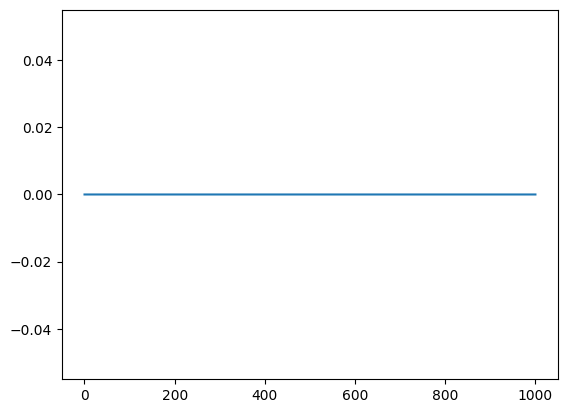

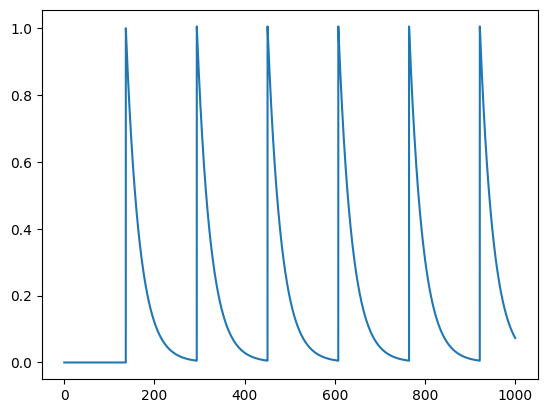

In [20]:
temp = None
x_scale = np.arange(int(weights.shape[0])) * resolution
for i in range(weights.shape[1]):
    temp = np.array(weights[:,i]).flatten()
    plt.plot(x_scale[1:], temp[1:])
plt.show()
for i in range(pre_v.shape[1]):
    temp = np.array(pre_v[:, i]).flatten()
    plt.plot(x_scale[1:], temp[1:])
plt.show()
for i in range(post_v.shape[1]):
    temp = np.array(post_v[:, i]).flatten()
    plt.plot(x_scale[1:], temp[1:])
plt.show()
for i in range(pre_syn.shape[1]):
    temp = np.array(pre_syn[:, i]).flatten()
    plt.plot(x_scale[1:], temp[1:])
plt.show()
for i in range(post_syn.shape[1]):
    temp = np.array(post_syn[:, i]).flatten()
    plt.plot(x_scale[1:], temp[1:])
plt.show()

In [ ]:
vis = retina(size=retina_size)
pattern = np.ones(3).reshape(1,3) * 50
vis.add_object(pattern)
vis.set_position_lazy(x='left', y='centered')
state = vis.show_current_state()
print(state)
print(vis.buffer_screen)

In [ ]:
vis.tick(delay=0, move_direction='right', noize_density=.2, noize_acceleration=77, rest=40)
state = vis.show_current_state()
print(state)
print(vis.buffer_screen)